<a href="https://colab.research.google.com/github/qmcsuzuki/QMCexamples/blob/main/%E3%81%95%E3%81%BE%E3%81%96%E3%81%BE%E3%81%AA%E7%82%B9%E9%9B%86%E5%90%88%E3%81%AE%E4%B8%80%E6%A7%98%E6%80%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qmcpy --quiet
import qmcpy
import numpy as np
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# 正方形上の散布図向けの設定にする
def set_scatter_plot(axes):
    axes.set_xticks([0,1])
    axes.set_yticks([0,1])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_aspect('equal')

def show_pointsets(pointsets,labels):
    """
    Args:
      pointsets: list of N*2 ndarrays.
      labels: list of strings, names of pointsets
    """
    k = len(pointsets)
    fig, axes = plt.subplots(ncols=k, figsize=(8,8))
    for i,points in enumerate(pointsets):
        axes[i].scatter(points[:,0], points[:,1],color="black",s=8)
        set_scatter_plot(axes[i])
        axes[i].set_title(labels[i])

    plt.savefig(f"{labels[0]}_{labels[1]}.pdf",format="pdf",bbox_inches='tight')
    plt.show()

## 実験

$N=64$点集合をプロットし、一様性を確かめる
- ランダム点集合、グリッド点集合
- ソボル点集合、ハルトン点集合、格子

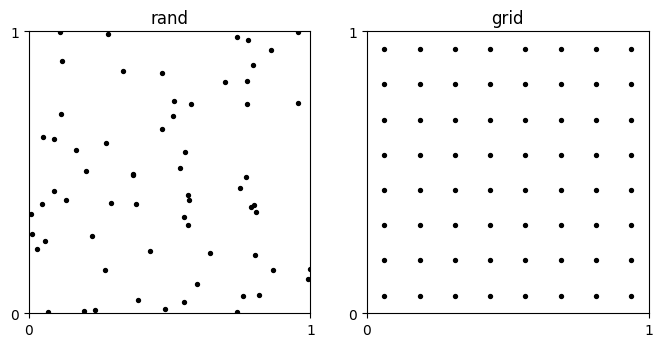

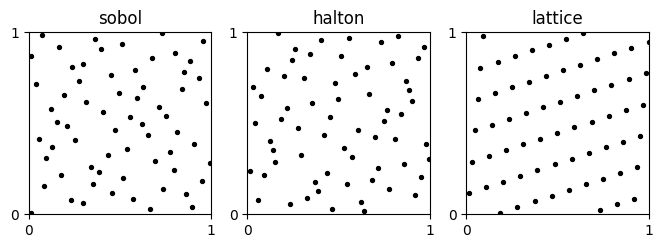

In [3]:
N = 64
sqrtN = int(np.sqrt(N))

rand = qmcpy.IIDStdUniform(2).gen_samples(N) # ランダム点集合
grid = np.meshgrid(np.linspace(0,1,sqrtN),np.linspace(0,1,sqrtN)) # グリッド点集合
grid = np.array(grid).reshape(2,-1).T * (sqrtN-1)/sqrtN + 1/(2*sqrtN)
show_pointsets([rand,grid],["rand","grid"])

sobol = qmcpy.Sobol(2,randomize=True).gen_samples(N) # ソボル点集合
halton = qmcpy.Halton(2,randomize=True).gen_samples(N) # ハルトン点集合
lattice = qmcpy.Lattice(2,randomize=True).gen_samples(N) # 格子点集合
show_pointsets([sobol,halton,lattice],["sobol","halton","lattice"])
